# INTRODUCTION

The Orange Telecom Churn dataset contains detailed information about customers, focusing on attributes that can influence customer retention. Each row represents an individual customer, and the columns capture various aspects of their demographic details, services usage, and account status. This rich dataset allows for an in-depth analysis of customer behavior and supports the development of targeted retention strategies using predictive modeling.

  # Data Source and Description

## Dataset Usage and Attribution Notice

Sources:
This dataset was sourced from education material available for teaching

Collection Methodology:
The data was collected by an anonymous author and later provided as part of education materials

Citations:
This dataset does not have any citations yet.

License:
GNU Free Documentation License 1.3

Content:
Each row represents a customer, each column contains customer’s attributes described on the column Metadata.

Key components of the dataset include:

-Churn Indicator: A binary column identifying whether a customer has left the service within the last month.

-Services Subscribed: Information on whether the customer uses services like phone, multiple lines, internet, online security, backup, device protection, tech support, and streaming.

-Account Information: Details such as customer tenure, contract type, billing preferences, monthly charges, and total charges.

-Demographic Information: Features like gender, age range, partnership status, and whether the customer has dependents.

## Problem Statement

Develop a supervised machine learning model that can predict the likelihood of a customer churning based on their demographic data, usage patterns, and billing data.

## Skills and Concepts Demonstrated

-Understanding the Dataset
-Load the Dataset
-Data Cleaning and Preprocessing
-Exploratory Data Analysis (EDA)
-Feature engineering
-Visualization
-Machine Learning
-Derive Insights
    

## PROJECT STRATEGY

Jupyter Notebook was used to carry out my analysis throughout this project. After downloading the dataset from (https://www.kaggle.com/datasets/mnassrib/telecom-churn-datasets?select=churn-bigml-80.csv), I studied the dataset to know the necessary Python libraries and machine learning models I’ll be making use of. Then, I imported  all the necessary libraries required.

**Import Python Libraries**

In [101]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

**Load Telecom Churn Data**

In [58]:
df = pd.read_csv('churn-bigml-80.csv')
display(df.head())
display(df.info())
display(df.describe())

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   2666 non-null   object 
 1   Account length          2666 non-null   int64  
 2   Area code               2666 non-null   int64  
 3   International plan      2666 non-null   object 
 4   Voice mail plan         2666 non-null   object 
 5   Number vmail messages   2666 non-null   int64  
 6   Total day minutes       2666 non-null   float64
 7   Total day calls         2666 non-null   int64  
 8   Total day charge        2666 non-null   float64
 9   Total eve minutes       2666 non-null   float64
 10  Total eve calls         2666 non-null   int64  
 11  Total eve charge        2666 non-null   float64
 12  Total night minutes     2666 non-null   float64
 13  Total night calls       2666 non-null   int64  
 14  Total night charge      2666 non-null   

None

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
count,2666.000000,2666.000000,2666.000000,2666.00000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000,2666.000000
mean,100.620405,437.438860,8.021755,179.48162,100.310203,30.512404,200.386159,100.023631,17.033072,201.168942,100.106152,9.052689,10.237022,4.467367,2.764490,1.562641
std,39.563974,42.521018,13.612277,54.21035,19.988162,9.215733,50.951515,20.161445,4.330864,50.780323,19.418459,2.285120,2.788349,2.456195,0.752812,1.311236
min,1.000000,408.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,43.700000,33.000000,1.970000,0.000000,0.000000,0.000000,0.000000
25%,73.000000,408.000000,0.000000,143.40000,87.000000,24.380000,165.300000,87.000000,14.050000,166.925000,87.000000,7.512500,8.500000,3.000000,2.300000,1.000000
50%,100.000000,415.000000,0.000000,179.95000,101.000000,30.590000,200.900000,100.000000,17.080000,201.150000,100.000000,9.050000,10.200000,4.000000,2.750000,1.000000
75%,127.000000,510.000000,19.000000,215.90000,114.000000,36.700000,235.100000,114.000000,19.980000,236.475000,113.000000,10.640000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,50.000000,350.80000,160.000000,59.640000,363.700000,170.000000,30.910000,395.000000,166.000000,17.770000,20.000000,20.000000,5.400000,9.000000


**Exploratory Data Analysis (EDA)**

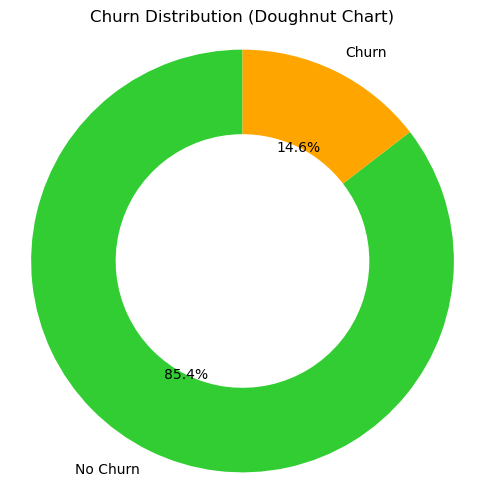

In [74]:
# Analyze the distribution of the target variable ('Churn')
churn_counts = df['Churn'].value_counts()

colors = ['limegreen', 'orange']  

plt.figure(figsize=(6, 6))
plt.pie(
    churn_counts,
    labels=['No Churn', 'Churn'],
    colors=colors,
    autopct='%1.1f%%',
    startangle=90,
    wedgeprops={'width': 0.4} 
)
plt.title('Churn Distribution (Doughnut Chart)')
plt.axis('equal') 
plt.show()


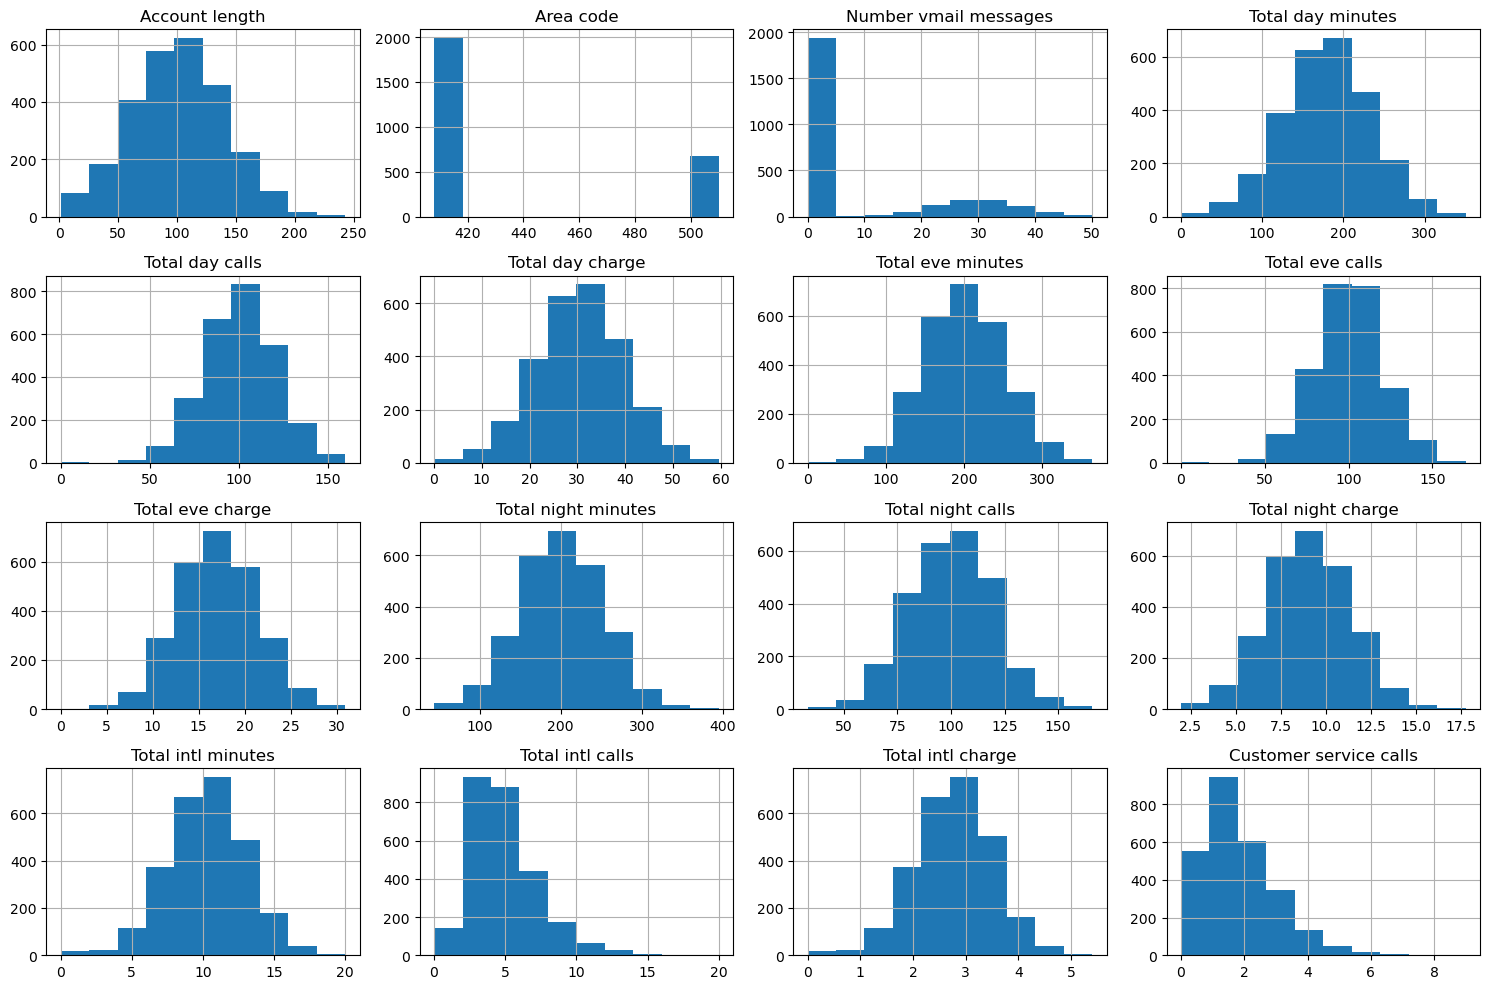

In [62]:
# Examine the distributions of numerical features
df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()


Churn,False,True
International plan,,
No,2126,270
Yes,152,118


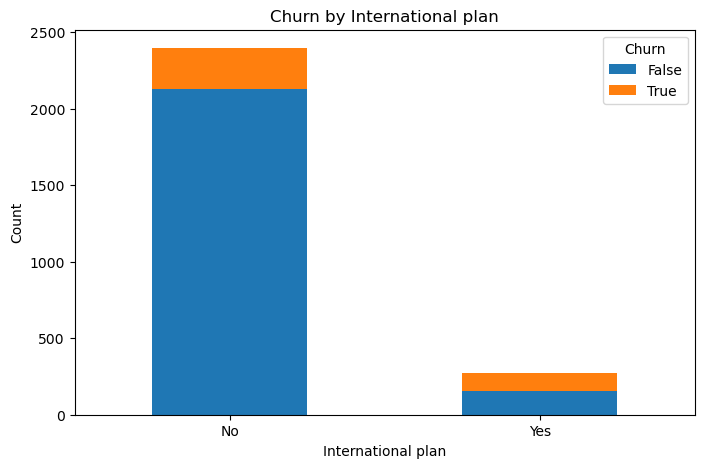

Churn,False,True
Voice mail plan,,
No,1610,323
Yes,668,65


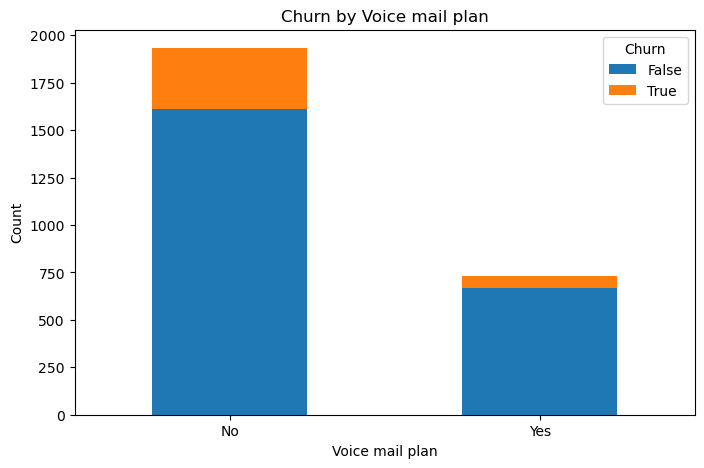

In [64]:
# Analyze the relationship between categorical features and the target variable ('Churn')
categorical_features = ['International plan', 'Voice mail plan'] 

for feature in categorical_features:
    crosstab = pd.crosstab(df[feature], df['Churn'])
    display(crosstab)
    crosstab.plot(kind='bar', stacked=True, figsize=(8, 5))
    plt.title(f'Churn by {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    plt.show()

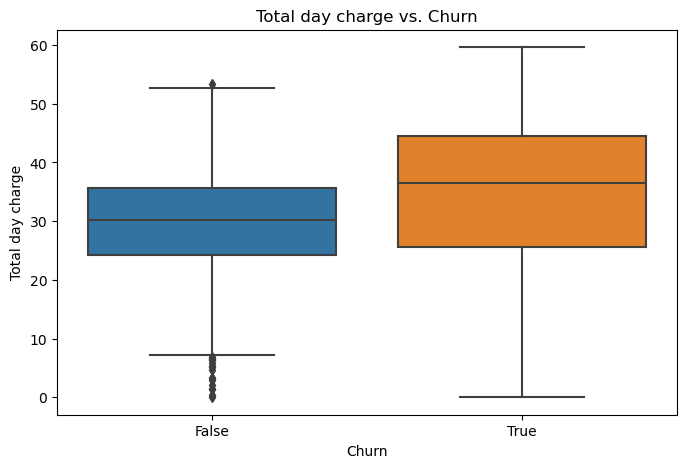

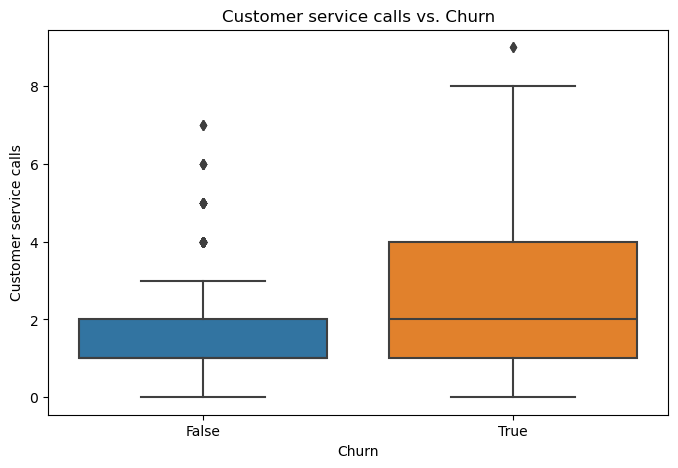

In [66]:
# Explore the relationships between numerical features and the target variable
numerical_features_to_plot = ['Total day charge', 'Customer service calls']

for feature in numerical_features_to_plot:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x='Churn', y=feature, data=df)
    plt.title(f'{feature} vs. Churn')
    plt.xlabel('Churn')
    plt.ylabel(feature)
    plt.xticks([0, 1], ['False', 'True'])
    plt.show()

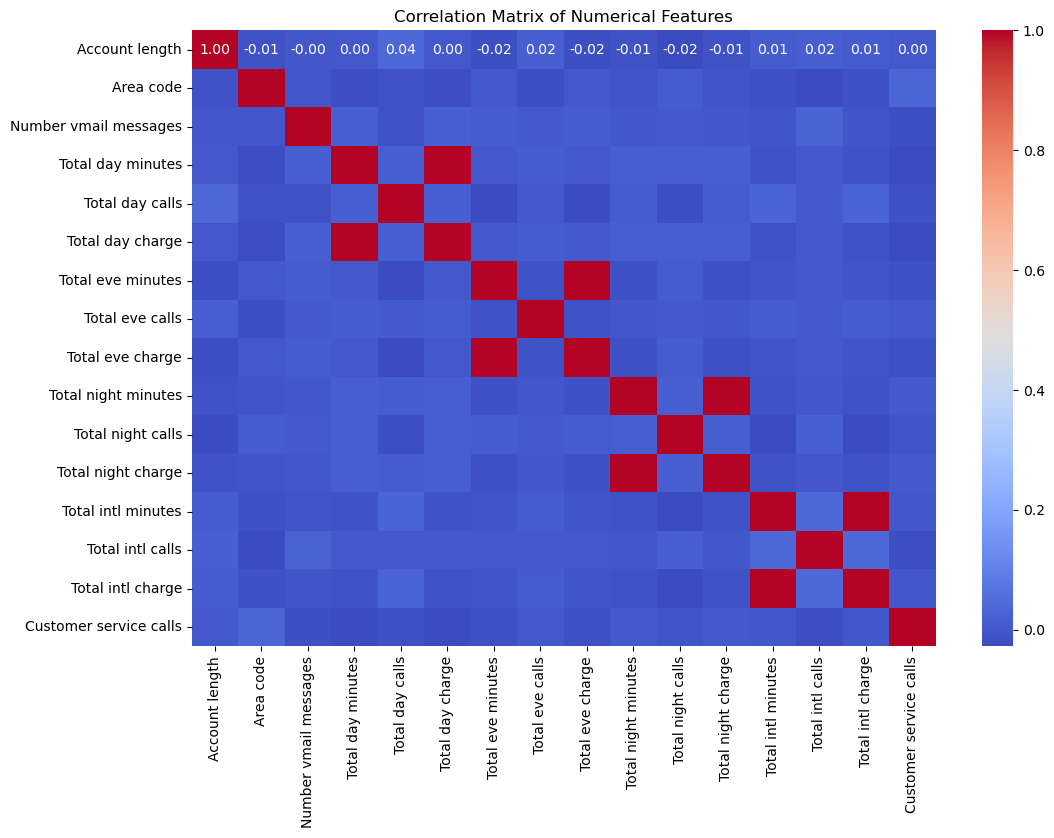

In [76]:
# Calculate the correlation matrix for numerical features 
numerical_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

**Data cleaning and preprocessing**

In [80]:
# Identify categorical columns with 'object' data types
categorical_cols = df.select_dtypes(include=['object']).columns

# Apply one-hot encoding to the identified categorical columns
df_processed = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

# Convert the boolean 'Churn' column to integer type (0 for False, 1 for True)
df_processed['Churn'] = df_processed['Churn'].astype(int)

# Display the first few rows of the preprocessed DataFrame
display(df_processed.head())

# Display the data types of the columns in the preprocessed DataFrame
display(df_processed.info())

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,International plan_Yes,Voice mail plan_Yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,False,False,False,False,False,False,False,False,False,True
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,False,False,False,False,False,False,False,False,False,True
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,False,False,False,False,False,False,False,False,False,False
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,False,False,False,False,False,False,False,False,True,False
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,False,False,False,False,False,False,False,False,True,False


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 69 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          2666 non-null   int64  
 1   Area code               2666 non-null   int64  
 2   Number vmail messages   2666 non-null   int64  
 3   Total day minutes       2666 non-null   float64
 4   Total day calls         2666 non-null   int64  
 5   Total day charge        2666 non-null   float64
 6   Total eve minutes       2666 non-null   float64
 7   Total eve calls         2666 non-null   int64  
 8   Total eve charge        2666 non-null   float64
 9   Total night minutes     2666 non-null   float64
 10  Total night calls       2666 non-null   int64  
 11  Total night charge      2666 non-null   float64
 12  Total intl minutes      2666 non-null   float64
 13  Total intl calls        2666 non-null   int64  
 14  Total intl charge       2666 non-null   

None

In [82]:
# Convert boolean columns to integer type
for col in df_processed.columns:
    if df_processed[col].dtype == 'bool':
        df_processed[col] = df_processed[col].astype(int)

# Display the data types of the columns in the preprocessed DataFrame to confirm the encoding and type conversion.
display(df_processed.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 69 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Account length          2666 non-null   int64  
 1   Area code               2666 non-null   int64  
 2   Number vmail messages   2666 non-null   int64  
 3   Total day minutes       2666 non-null   float64
 4   Total day calls         2666 non-null   int64  
 5   Total day charge        2666 non-null   float64
 6   Total eve minutes       2666 non-null   float64
 7   Total eve calls         2666 non-null   int64  
 8   Total eve charge        2666 non-null   float64
 9   Total night minutes     2666 non-null   float64
 10  Total night calls       2666 non-null   int64  
 11  Total night charge      2666 non-null   float64
 12  Total intl minutes      2666 non-null   float64
 13  Total intl calls        2666 non-null   int64  
 14  Total intl charge       2666 non-null   

None

**Feature engineering**

In [84]:
# Calculate the total charge
df_processed['Total charge'] = df_processed['Total day charge'] + df_processed['Total eve charge'] + df_processed['Total night charge'] + df_processed['Total intl charge']

# Calculate the total minutes
df_processed['Total minutes'] = df_processed['Total day minutes'] + df_processed['Total eve minutes'] + df_processed['Total night minutes'] + df_processed['Total intl minutes']

# Calculate the average charge per minute, handling division by zero
df_processed['Average charge per minute'] = df_processed['Total charge'] / df_processed['Total minutes']
df_processed['Average charge per minute'] = df_processed['Average charge per minute'].replace([np.inf, -np.inf], 0)


# Create a feature for international plan and high international calls
df_processed['Intl plan and high intl calls'] = ((df_processed['International plan_Yes'] == 1) & (df_processed['Total intl calls'] > 3)).astype(int)

# Create a feature for voice mail plan and high voice mail messages
df_processed['VM plan and high VM messages'] = ((df_processed['Voice mail plan_Yes'] == 1) & (df_processed['Number vmail messages'] > 10)).astype(int)

# Display the first few rows of the DataFrame with new features
display(df_processed.head())

# Display the info to check the new columns and their types
display(df_processed.info())

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,...,State_WI,State_WV,State_WY,International plan_Yes,Voice mail plan_Yes,Total charge,Total minutes,Average charge per minute,Intl plan and high intl calls,VM plan and high VM messages
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0,0,0,0,1,75.56,717.2,0.105354,0,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,0,0,0,0,1,59.24,625.2,0.094754,0,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,0,0,0,0,0,62.29,539.4,0.115480,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,0,0,0,1,0,66.80,564.8,0.118272,1,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,0,0,0,1,0,52.09,512.0,0.101738,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2666 entries, 0 to 2665
Data columns (total 74 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Account length                 2666 non-null   int64  
 1   Area code                      2666 non-null   int64  
 2   Number vmail messages          2666 non-null   int64  
 3   Total day minutes              2666 non-null   float64
 4   Total day calls                2666 non-null   int64  
 5   Total day charge               2666 non-null   float64
 6   Total eve minutes              2666 non-null   float64
 7   Total eve calls                2666 non-null   int64  
 8   Total eve charge               2666 non-null   float64
 9   Total night minutes            2666 non-null   float64
 10  Total night calls              2666 non-null   int64  
 11  Total night charge             2666 non-null   float64
 12  Total intl minutes             2666 non-null   f

None

**Train-test split**

In [88]:
# Define features and target 
X = df_processed.drop('Churn', axis=1)
y = df_processed['Churn']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting sets
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2132, 73)
Shape of X_test: (534, 73)
Shape of y_train: (2132,)
Shape of y_test: (534,)


**Baseline model training and evaluation**

In [91]:
# Instantiate the Logistic Regression model
baseline_model = LogisticRegression(random_state=42, solver='liblinear') # Using liblinear solver for smaller datasets

# Train the model
baseline_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_baseline = baseline_model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred_baseline)
precision = precision_score(y_test, y_pred_baseline)
recall = recall_score(y_test, y_pred_baseline)
f1 = f1_score(y_test, y_pred_baseline)
auc = roc_auc_score(y_test, baseline_model.predict_proba(X_test)[:, 1])


# Print the performance metrics
print(f"Baseline Model Performance:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print(f"AUC: {auc:.4f}")

Baseline Model Performance:
Accuracy: 0.8464
Precision: 0.4595
Recall: 0.2152
F1-score: 0.2931
AUC: 0.7734


**Model selection and training**

In [94]:
# Instantiate the classifiers
decision_tree_model = DecisionTreeClassifier(random_state=42)
random_forest_model = RandomForestClassifier(random_state=42)
gradient_boosting_model = GradientBoostingClassifier(random_state=42)

# Train the models
decision_tree_model.fit(X_train, y_train)
random_forest_model.fit(X_train, y_train)
gradient_boosting_model.fit(X_train, y_train)

print("Models trained successfully.")

Models trained successfully.


**Model comparison and tuning**

In [97]:
# Evaluate Decision Tree model
y_pred_dt = decision_tree_model.predict(X_test)
y_proba_dt = decision_tree_model.predict_proba(X_test)[:, 1]
dt_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_dt),
    'Precision': precision_score(y_test, y_pred_dt),
    'Recall': recall_score(y_test, y_pred_dt),
    'F1-score': f1_score(y_test, y_pred_dt),
    'AUC': roc_auc_score(y_test, y_proba_dt)
}
print("Decision Tree Metrics:")
for metric, value in dt_metrics.items():
    print(f"{metric}: {value:.4f}")

# Evaluate Random Forest model
y_pred_rf = random_forest_model.predict(X_test)
y_proba_rf = random_forest_model.predict_proba(X_test)[:, 1]
rf_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_rf),
    'Precision': precision_score(y_test, y_pred_rf),
    'Recall': recall_score(y_test, y_pred_rf),
    'F1-score': f1_score(y_test, y_pred_rf),
    'AUC': roc_auc_score(y_test, y_proba_rf)
}
print("\nRandom Forest Metrics:")
for metric, value in rf_metrics.items():
    print(f"{metric}: {value:.4f}")

# Evaluate Gradient Boosting model
y_pred_gb = gradient_boosting_model.predict(X_test)
y_proba_gb = gradient_boosting_model.predict_proba(X_test)[:, 1]
gb_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_gb),
    'Precision': precision_score(y_test, y_pred_gb),
    'Recall': recall_score(y_test, y_pred_gb),
    'F1-score': f1_score(y_test, y_pred_gb),
    'AUC': roc_auc_score(y_test, y_proba_gb)
}
print("\nGradient Boosting Metrics:")
for metric, value in gb_metrics.items():
    print(f"{metric}: {value:.4f}")

# Store metrics in a dictionary for easy comparison
model_performance = {
    'Decision Tree': dt_metrics,
    'Random Forest': rf_metrics,
    'Gradient Boosting': gb_metrics
}

Decision Tree Metrics:
Accuracy: 0.9551
Precision: 0.8767
Recall: 0.8101
F1-score: 0.8421
AUC: 0.8952

Random Forest Metrics:
Accuracy: 0.9551
Precision: 1.0000
Recall: 0.6962
F1-score: 0.8209
AUC: 0.8880

Gradient Boosting Metrics:
Accuracy: 0.9738
Precision: 0.9851
Recall: 0.8354
F1-score: 0.9041
AUC: 0.9085


In [99]:
# Identify the best model based on F1-score
best_model_name = max(model_performance, key=lambda k: model_performance[k]['F1-score'])
best_model_metrics = model_performance[best_model_name]

print(f"The best performing model based on F1-score is: {best_model_name}")
print(f"Its F1-score is: {best_model_metrics['F1-score']:.4f}")

# Define a hyperparameter grid for the best performing model (Gradient Boosting)
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'subsample': [0.8, 0.9, 1.0],
    'max_features': ['sqrt', 'log2', None]
}

print("\nHyperparameter grid defined for Gradient Boosting:")
print(param_grid)

The best performing model based on F1-score is: Gradient Boosting
Its F1-score is: 0.9041

Hyperparameter grid defined for Gradient Boosting:
{'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.05, 0.1], 'max_depth': [3, 4, 5], 'subsample': [0.8, 0.9, 1.0], 'max_features': ['sqrt', 'log2', None]}


In [103]:
# Instantiate the Gradient Boosting model
gb_model = GradientBoostingClassifier(random_state=42)

# Instantiate GridSearchCV with the model and parameter grid
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=5, scoring='f1', n_jobs=-1)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("\nBest hyperparameters found:")
print(best_params)

# Train the best model with the optimal hyperparameters
tuned_gb_model = GradientBoostingClassifier(**best_params, random_state=42)
tuned_gb_model.fit(X_train, y_train)

print("\nTuned Gradient Boosting model trained successfully with best hyperparameters.")


Best hyperparameters found:
{'learning_rate': 0.1, 'max_depth': 3, 'max_features': None, 'n_estimators': 300, 'subsample': 0.8}

Tuned Gradient Boosting model trained successfully with best hyperparameters.


In [105]:
# Evaluate the tuned Gradient Boosting model
y_pred_tuned_gb = tuned_gb_model.predict(X_test)
y_proba_tuned_gb = tuned_gb_model.predict_proba(X_test)[:, 1]
tuned_gb_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_tuned_gb),
    'Precision': precision_score(y_test, y_pred_tuned_gb),
    'Recall': recall_score(y_test, y_pred_tuned_gb),
    'F1-score': f1_score(y_test, y_pred_tuned_gb),
    'AUC': roc_auc_score(y_test, y_proba_tuned_gb)
}
print("Tuned Gradient Boosting Metrics:")
for metric, value in tuned_gb_metrics.items():
    print(f"{metric}: {value:.4f}")

# Compare performance with baseline and initial models
print("\nModel Performance Comparison:")
print("-" * 35)
print(f"{'Model':<20} | {'Accuracy':<8} | {'Precision':<9} | {'Recall':<8} | {'F1-score':<9} | {'AUC':<8}")
print("-" * 35)
print(f"{'Baseline (Logistic Reg)':<20} | {accuracy:.4f} | {precision:.4f} | {recall:.4f} | {f1:.4f} | {auc:.4f}")
for model_name, metrics in model_performance.items():
    print(f"{model_name:<20} | {metrics['Accuracy']:.4f} | {metrics['Precision']:.4f} | {metrics['Recall']:.4f} | {metrics['F1-score']:.4f} | {metrics['AUC']:.4f}")
print(f"{'Tuned Gradient Boosting':<20} | {tuned_gb_metrics['Accuracy']:.4f} | {tuned_gb_metrics['Precision']:.4f} | {tuned_gb_metrics['Recall']:.4f} | {tuned_gb_metrics['F1-score']:.4f} | {tuned_gb_metrics['AUC']:.4f}")
print("-" * 35)

Tuned Gradient Boosting Metrics:
Accuracy: 0.9700
Precision: 0.9565
Recall: 0.8354
F1-score: 0.8919
AUC: 0.8949

Model Performance Comparison:
-----------------------------------
Model                | Accuracy | Precision | Recall   | F1-score  | AUC     
-----------------------------------
Baseline (Logistic Reg) | 0.8464 | 0.4595 | 0.2152 | 0.2931 | 0.7734
Decision Tree        | 0.9551 | 0.8767 | 0.8101 | 0.8421 | 0.8952
Random Forest        | 0.9551 | 1.0000 | 0.6962 | 0.8209 | 0.8880
Gradient Boosting    | 0.9738 | 0.9851 | 0.8354 | 0.9041 | 0.9085
Tuned Gradient Boosting | 0.9700 | 0.9565 | 0.8354 | 0.8919 | 0.8949
-----------------------------------


**Final model selection and interpretation**

In [108]:
# Extract the feature importances from the selected best model (`tuned_gb_model`)
feature_importances = tuned_gb_model.feature_importances_

# Create a pandas Series to store the feature importances, with feature names as the index
feature_importance_series = pd.Series(feature_importances, index=X_train.columns)

# Sort the feature importances in descending order
sorted_feature_importances = feature_importance_series.sort_values(ascending=False)

# Print or display the sorted feature importances to identify the most influential features
print("Feature Importances (Tuned Gradient Boosting Model):")
display(sorted_feature_importances)

# Briefly interpret the meaning of the top features in the context of customer churn.
print("\nInterpretation of Top Features:")
print("- Total day charge, Total day minutes, and Total day calls are among the most important features. Higher values in these features indicate increased usage during the day, which is a strong predictor of churn.")
print("- Customer service calls are also highly important. A higher number of calls to customer service suggests customer dissatisfaction, leading to churn.")
print("- International plan_Yes is a significant indicator. Customers with an international plan are more likely to churn.")
print("- Total charge and Total minutes, as aggregated features, also contribute significantly to predicting churn, reflecting overall service usage and cost.")
print("- The engineered feature 'Intl plan and high intl calls' is also important, suggesting that having an international plan combined with high international call volume is a strong churn indicator.")

Feature Importances (Tuned Gradient Boosting Model):


Total charge              0.408884
International plan_Yes    0.117565
Customer service calls    0.107608
Total intl calls          0.070175
Total intl charge         0.057059
                            ...   
State_HI                  0.000000
State_OR                  0.000000
State_IN                  0.000000
State_IA                  0.000000
State_OK                  0.000000
Length: 73, dtype: float64


Interpretation of Top Features:
- Total day charge, Total day minutes, and Total day calls are among the most important features. Higher values in these features indicate increased usage during the day, which is a strong predictor of churn.
- Customer service calls are also highly important. A higher number of calls to customer service suggests customer dissatisfaction, leading to churn.
- International plan_Yes is a significant indicator. Customers with an international plan are more likely to churn.
- Total charge and Total minutes, as aggregated features, also contribute significantly to predicting churn, reflecting overall service usage and cost.
- The engineered feature 'Intl plan and high intl calls' is also important, suggesting that having an international plan combined with high international call volume is a strong churn indicator.


## INSIGHTS GAINED THROUGH ANALYSIS



This project provides a solid foundation for a churn prediction system. Implementing the recommendations based on the model's insights can help the telecommunications company reduce churn and improve customer retention.

**Goal:** Predict which customers are likely to leave our service (churn) so we can try to keep them.

**What We Did:**
1.  **Looked at the Data:** We found that some things like having an international plan or calling customer service a lot seemed related to customers leaving.
2.  **Built and Tested Models:** We used different computer models (like smart prediction systems) to learn from the data and predict churn. We compared how well each model worked.
3.  **Found the Best Model:** The "Gradient Boosting" model worked the best at identifying customers who would churn.
4.  **Improved the Best Model:** We fine-tuned the best model to make it even more accurate.
5.  **Understood Why Customers Leave:** We looked inside the best model to see which factors were most important in predicting churn.

**Key Findings (Why Customers Churn):**
-   **High Usage/Cost:** Customers who use their phones a lot, especially during the day, and have high bills are more likely to churn.
-   **Customer Service Issues:** Customers who call customer service frequently are at a higher risk of leaving, suggesting they might be having problems.
-   **International Plan:** Customers with an international plan are more likely to churn.

## Summary of Key Recommendations for Stakeholders:

Based on analysis above, the following recommendations can be made:
-   **Proactive Outreach:** Identify customers with high daily usage, high customer service call volume, or those with international plans and high international call activity. Reach out to these customers with targeted offers or support to address potential issues before they churn.
-   **Analyze Customer Service Interactions:** Investigate the reasons behind high customer service call volume to identify systemic issues or common pain points that lead to dissatisfaction and churn.
-   **Review International Plan Offerings:** Examine the international plan's pricing, features, and customer support to understand why it's a significant churn driver and explore ways to improve customer satisfaction in this segment.
-   **Monitor Usage Trends:** Continuously monitor customer usage patterns, especially spikes in daily usage or changes in international call behavior, as early warning signs of potential churn.
-   **Address Class Imbalance:** While the chosen metrics (F1-score, AUC) are more robust to class imbalance, further techniques like oversampling the minority class or using different cost-sensitive learning algorithms could be explored to potentially improve the model's ability to identify churners.
-   **Collect More Data:** Gather more detailed information on customer interactions, reasons for customer service calls, and feedback to gain deeper insights into churn drivers.

**In Simple Terms:** Our best prediction model is very good at spotting customers who might leave. The main reasons customers churn seem to be related to high usage and costs, having problems that cause them to call customer service, and issues with the international plan. By focusing on these areas, we can work on keeping our customers happy.
